# O4

## Problem
DONE! - dataanalyse
<details>
<summary>
Bjarke need these links
</summary>


https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md

https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

https://www.tensorflow.org/tutorials/images/classification

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d

## Ways to build 

```
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
```
</details>

## Datasæt 
DONE! - dataanalyse

# Valg af ML
* Bruger supervised learning
* Bruger CNN da det er billede data
* Bruger categorical_crossentropy algorith, da vi har flere kategorier eller SparseCategoricalCrossentropy
* Maybe need preprocessed
* Hvordan forholder vi os til over and underfitting
* RandomGridSearch?

## Håndtering af optimering, fordele og ulemper 
* Overfitting/underfitting
* Optimeringsparametre, hyperparameterrummet 
* 






# Load The Data

In [15]:
import cv2, os
import numpy as np

def getDataSet(categories: list, folder: str):
    images = []
    labels = []
    for category in categories:
        folder_path = os.path.join(folder, category)
        label = categories.index(category)  # Assign a numerical label to each category
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (128, 128))  # Resize to a common size
                    img = img / 255.0  # Normalize pixel values to [0, 1]
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Failed to load image: {img_path}")
    return np.array(images), np.array(labels)

# Create histograms

Failed to load image: weather_dataset\Shine\shine131.jpg
Failed to load image: weather_dataset\Rain\rain141.jpg


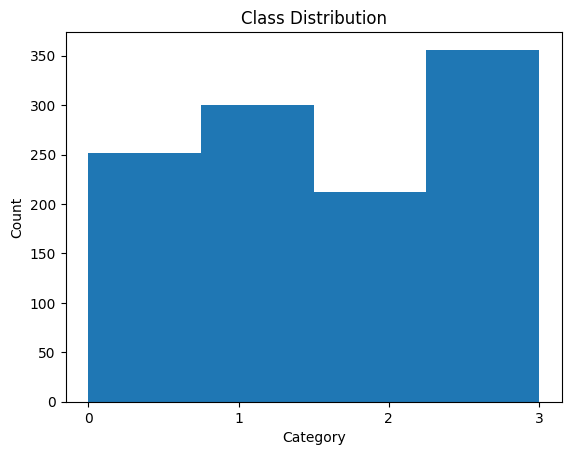

Category for image 0: Shine


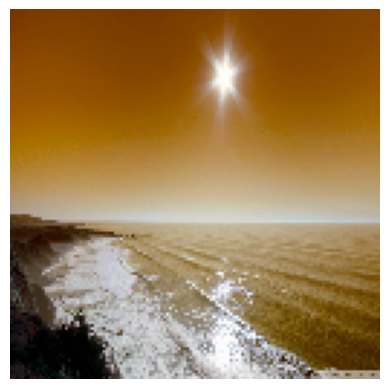

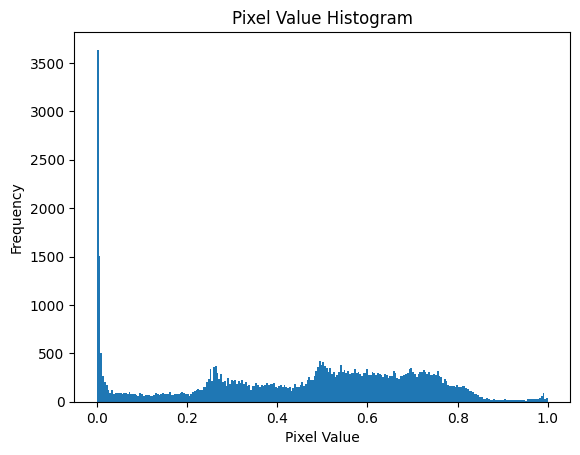

In [26]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data_folder = "weather_dataset"
categories = ["Shine", "Cloudy", "Rain", "Sunrise"]

#X is images
#y is labels

X, y = getDataSet(categories, data_folder)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming 'labels' is a list or NumPy array of category labels
# You can create histograms of the labels to visualize the class distribution
plt.hist(y, bins=len(np.unique(y)))  # Use as many bins as unique labels
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(np.unique(y))  # Set x-ticks to unique class labels
plt.show()

# Assuming 'images' is a NumPy array containing the image data
# You can create a histogram of pixel values for one image (e.g., the first image)
print(f"Category for image 0: {categories[y[0]]}")
  
plt.imshow(X[0])
plt.axis('off')  # Optional: Turn off the axis labels and ticks
#plt.title(categories[X[0]])
plt.show()

plt.hist(X[0].ravel(), bins=256, range=(0, 1))  # Assuming normalized pixel values in [0, 1]
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Histogram')
plt.show()

# Check the shapes

In [33]:
from tensorflow.keras.utils import to_categorical

def checkShapeBeforeReshape(X_train, y_train, X_test, y_test):
    print("X_train shape before reshape:", X_train.shape)
    print("X_test shape before reshape:", X_test.shape)

    print("y_categotical_train shape before reshape:", y_train.shape)
    print("y_categotical_test shape before reshape:", y_test.shape)


def reshape(X_train, y_train, X_test, y_test):
    X_train = X_train.reshape((896, 128, 128, 3)).astype('float32') / 255.0
    X_test = X_test.reshape((224, 128, 128, 3)).astype('float32') / 255.0
    print("X_train shape after reshape:", X_train.shape)
    print("X_test shape after reshape:", X_test.shape)

    if y_train.ndim == 1 or y_test.ndim == 1:
        y_train = to_categorical(y_train, num_classes=4)
        y_test = to_categorical(y_test, num_classes=4)
    print("y_categotical_train shape after reshape:", y_train.shape)
    print("y_categotical_test shape after reshape:", y_test.shape)
    return X_train, y_train, X_test, y_test

checkShapeBeforeReshape(X_train, y_train, X_test, y_test)

X_train, y_train, X_test, y_test = reshape(X_train, y_train, X_test, y_test)

X_train shape before reshape: (896, 128, 128, 3)
X_test shape before reshape: (224, 128, 128, 3)
y_categotical_train shape before reshape: (896, 4)
y_categotical_test shape before reshape: (224, 4)
X_train shape after reshape: (896, 128, 128, 3)
X_test shape after reshape: (224, 128, 128, 3)
y_categotical_train shape after reshape: (896, 4)
y_categotical_test shape after reshape: (224, 4)


# Create function for later use

In [34]:
def plot_training_metrics(train_losses, train_accuracies):
    # Plot Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(np.mean(train_losses, axis=0), label='Training Loss')
    plt.title('Training Loss Over Iterations')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(np.mean(train_accuracies, axis=0), label='Training Accuracy')
    plt.title('Training Accuracy Over Iterations')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def print_Average(test_accuracy, loss_per_fold):
    # Print out average value for the model
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(test_accuracy)} (+- {np.std(test_accuracy)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')

SyntaxError: expected ':' (2975544561.py, line 21)

# Generate Model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential 

def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # Change to 4 for your 4 classes

    # Plot the model
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Train the model For normal cnn
For genderate the picture you have too run the commands:
````
pip install graphiz 
pip install pydot
```

7/7 [==============================] - 1s 58ms/step - loss: 1.3722 - accuracy: 0.2768
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.2767857015132904 (+- 0.0)
> Loss: 0.9992664605379105
------------------------------------------------------------------------
------------------------------------------------------------------------


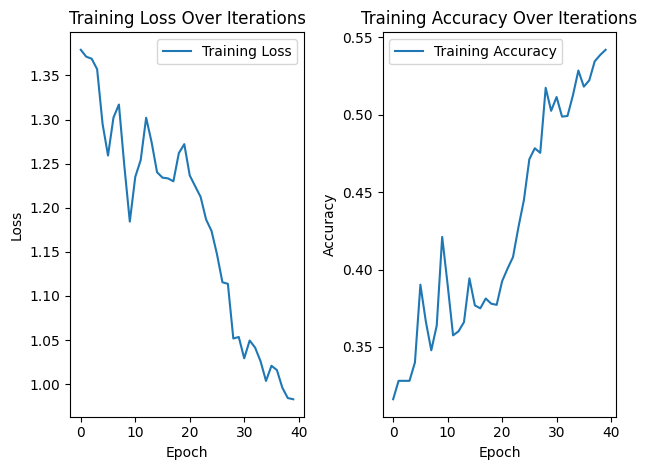

In [ ]:
from sklearn.model_selection import StratifiedKFold

folds = 4
kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

test_accuracies = []
loss_per_fold = []
train_losses = []
train_accuracies = []

for train, val in kfold.split(X_train, y_train.argmax(1)):
    model = createModel()

    X_train_kfold, x_val_kfold = X_train[train], X_train[val]
    y_train_kfold, y_val_kfold = y_train[train], y_train[val]

    history = model.fit(X_train_kfold, y_train_kfold, epochs=40, batch_size=64, verbose=0)

    train_losses.append(history.history['loss'])
    train_accuracies.append(history.history['accuracy'])

    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    test_accuracies.append(test_accuracy)
    loss_per_fold.append(test_loss)


#avg_accuracy = np.mean(test_accuracy)

print_Average(test_accuracy=test_accuracies, loss_per_fold=loss_per_fold)


# Format data to np.array for easier use
train_losses = np.array(train_losses)
train_accuracies = np.array(train_accuracies)

plot_training_metrics(train_losses, train_accuracies)



# Try to combine models

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming X_train, y_train, X_test, y_test are your image and label data

# Encode labels
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
# y_train_categorical = to_categorical(y_train_encoded)
# y_test_categorical = to_categorical(y_test_encoded)

# Create CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(4,activation='sigmoid',name='fc4'))
model.compile(loss="categorical_crossentropy", optimizer="adam")

# Extract features using the CNN
model.fit(X,y, epochs=10)
model.pop() # this will remove the last layer
model.summary() # check the network 

# Create and train SVM model
feature_mapping = model(X) 
clf = SVC()
clf.fit(feature_mapings, y)
# Evaluate the SVM model
#test_accuracy = SVC.score(X_test_features, y_test_encoded)
print(f'Test Accuracy: {test_accuracy}')


# Plot Training Accuracy
plt.plot(test_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy Over Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/10


ValueError: in user code:

    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\src\engine\training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\src\backend.py", line 5575, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 4) are incompatible


## Second attempt

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are your image and label data

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(np.argmax(y_train, axis=1))
y_test_encoded = label_encoder.transform(np.argmax(y_test, axis=1))

# Create CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(4, activation='softmax', name='fc4'))
cnn_model.compile(loss="categorical_crossentropy", optimizer="adam")

# Extract features using the CNN
cnn_model.fit(X_train, to_categorical(y_train_encoded), epochs=10)
cnn_model.pop()  # this will remove the last layer
cnn_model.summary()  # check the network

# Create and train SVM model
print(f'Now we testing the SVC model')
feature_mappings = cnn_model.predict(X_train)
clf = SVC()
clf.fit(feature_mappings, y_train_encoded)
clf.predict(X_train)


# Evaluate the SVM model
test_feature_mappings = clf.predict(X_test)
test_accuracy = clf.score(test_feature_mappings, y_test_encoded)
print(f'Test Accuracy: {test_accuracy}')



# Plot Training Accuracy
plt.plot(test_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy Over Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


ValueError: y should be a 1d array, got an array of shape (896, 4) instead.

## Thrid attempt

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are your image and label data

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(np.argmax(y_train, axis=1))
y_test_encoded = label_encoder.transform(np.argmax(y_test, axis=1))

# Convert labels to categorical
y_categotical_train = to_categorical(y_train)
y_categotical_test = to_categorical(y_test)

# Create CNN model
def create_cnn_model():
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(4, activation='softmax', name='fc4'))
    cnn_model.compile(loss="categorical_crossentropy", optimizer="adam")
    return cnn_model

# Wrap the Keras model with KerasClassifier
cnn_classifier = KerasClassifier(build_fn=create_cnn_model, epochs=10, verbose=1)

# Create SVM model
svm_model = SVC()

# Create a pipeline with CNN feature extraction and SVM training
pipeline = Pipeline([
    ('cnn', cnn_classifier),
    ('scaler', StandardScaler()),
    ('svm', svm_model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_categotical_train)

# Evaluate the pipeline on the test data
test_accuracy = pipeline.score(X_test, y_categotical_test)
print(f'Test Accuracy: {test_accuracy}')


ValueError: y should be a 1d array, got an array of shape (896, 4) instead.